In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
image=cv2.imread(r"C:\\Users\Student\Desktop\pic05\x.jpg")

In [3]:
gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

In [4]:
gray_blur=cv2.GaussianBlur(gray,(31,31),0)

In [5]:
thresh=cv2.adaptiveThreshold(gray_blur,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV,11,1)

In [6]:
kernel=np.ones((5,5),np.uint8)

In [7]:
closing=cv2.morphologyEx(thresh,cv2.MORPH_CLOSE,kernel)

In [8]:
contours,hirarchy=cv2.findContours(closing,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)


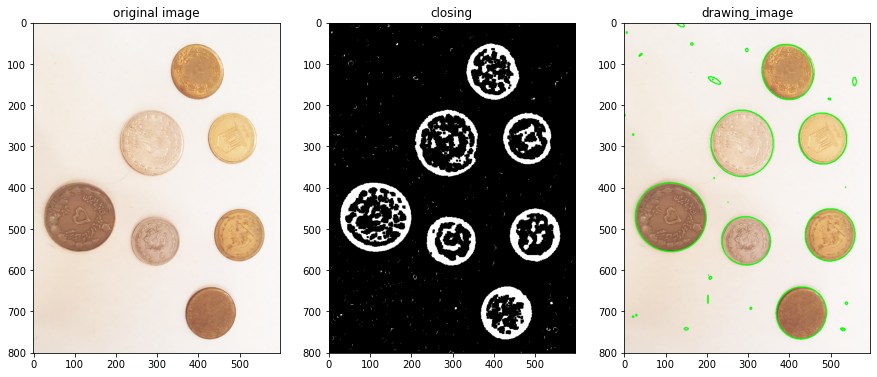

In [9]:
drawing_image=image.copy()
for c in contours:
    if len(c)<5:
        continue
    ellips=cv2.fitEllipse(c)
    cv2.ellipse(drawing_image,ellips,(0,255,0),2)
plt.figure(figsize=[15,15])
plt.subplot(131);plt.imshow(image[...,::-1]);plt.title("original image")
plt.subplot(132);plt.imshow(closing,cmap="gray");plt.title("closing")
plt.subplot(133);plt.imshow(drawing_image[...,::-1]);plt.title("drawing_image")
plt.show()

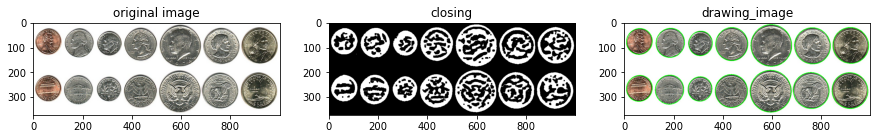

In [10]:
image=cv2.imread(r"C:\\Users\Student\Desktop\pic05\money.jpg")
gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
gray_blur=cv2.GaussianBlur(gray,(31,31),0)
thresh=cv2.adaptiveThreshold(gray_blur,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV,11,1)
kernel=np.ones((5,5),np.uint8)
closing=cv2.morphologyEx(thresh,cv2.MORPH_CLOSE,kernel)
contours,hirarchy=cv2.findContours(closing,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
drawing_image=image.copy()
for c in contours:
    area=cv2.contourArea(c)
    if area<5000 or area>50000:
        continue
    if len(c)<5:
        continue
        
    ellips=cv2.fitEllipse(c)
    cv2.ellipse(drawing_image,ellips,(0,255,0),2)
plt.figure(figsize=[15,15])
plt.subplot(131);plt.imshow(image[...,::-1]);plt.title("original image")
plt.subplot(132);plt.imshow(closing,cmap="gray");plt.title("closing")
plt.subplot(133);plt.imshow(drawing_image[...,::-1]);plt.title("drawing_image")
plt.show()